# Decision Trees

A decision tree is a different type of modelling method for building a predictive model.  



In [195]:
from datascience import *
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import scipy.stats as stats
import scipy
from sklearn import tree
import sklearn.metrics as metrics


import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)

def TwoWaySummary(x):
    """ x must be a 2x2 table arranged T+ F-, F+ T-"""
    a = x[[0],[0]][0]
    b = x[[0],[1]][0]
    c = x[[1],[0]][0]
    d = x[[1],[1]][0]
    
    print(f"sensitivity = {a/(a+b)}\nspecificity = {d/(c+d)}\nrelative risk = {a*(c+d)/(c*(a+b))}\naccuracy = {(a+d)/(a+d+c+b)}")
    
mushroom = Table.read_table("mushrooms.csv")

mushroom

Poisonous,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,Stalk Shape,Stalk Root,Stalk surface above ring,Stalk surface below ring,Stalk color above ring,Stalk color below ring,Veil type,Veil color,Ring number,Ring type,Spore print color,Population,Habit
p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


Recall this mushroom data is intended to be used to build models for predicting whether a found mushroom will be poisonous.  

Let's first create out Training and Testing data sets.  By now, you've realized that there are canned packages that will do this for us, but I like the transparency of using our code that we built ourselves.  

In [207]:
name ="mushrooms"  ## Put the name of the cvs file here.  DO NOT include the .csv, the code will add that later  
Save = "Yes"     ## Use "Yes" or "No" to indicate whether you want these split data sets to available for other 
                 ## notebooks to use.  Today, for these data sets, we do.  

np.random.seed(3)  # Change frequently, but use if you want the same data everytime. 

## Change nothing below here unless you know what you're changing ####################################
######################################################################################################

csvname = name+".csv"

ds = pd.read_csv(csvname)  # Change only this line as needed to read in the data!!
N = len(ds)

 

train_N = round(0.8*N)

train_rows = np.random.choice(np.arange(N), train_N).tolist()

ds_train = ds.iloc[train_rows]

ds_test = ds.drop(index = train_rows)

if Save == "Yes":
    train_name = name+"_train.csv"
    test_name = name+"_test.csv"

    ds_train.to_csv(train_name)

    ds_test.to_csv(test_name)
    
    print(f"You selected 'Yes' for Save so your two new datasets are called {train_name} and {test_name}. \n ")

print("Your split data sets are called ds_train and ds_test in this notebook, now.  You can change their names by resaving them now.\n ")

print("Here's a preview of your training data, ds_train")
display(ds_train.head(5))

print("Here's a preview of your testing data, ds_test")
ds_test.head(5)


You selected 'Yes' for Save so your two new datasets are called mushrooms_train.csv and mushrooms_test.csv. 
 
Your split data sets are called ds_train and ds_test in this notebook, now.  You can change their names by resaving them now.
 
Here's a preview of your training data, ds_train


,Poisonous,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,Stalk surface below ring,Stalk color above ring,Stalk color below ring,Veil type,Veil color,Ring number,Ring type,Spore print color,Population,Habit
5994,p,x,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,l
1688,e,x,y,n,t,n,f,c,b,p,...,s,g,w,p,w,o,p,n,y,d
3321,e,f,f,n,t,n,f,c,b,w,...,s,w,p,p,w,o,p,k,v,d
1667,p,x,s,w,t,p,f,c,n,w,...,s,w,w,p,w,o,p,k,s,u
7096,p,k,y,n,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p


Here's a preview of your testing data, ds_test


,Poisonous,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,Stalk surface below ring,Stalk color above ring,Stalk color below ring,Veil type,Veil color,Ring number,Ring type,Spore print color,Population,Habit
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
10,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


In [208]:
mushroom_train = ds_train

mushroom_test = ds_test

In [145]:
Y = mushroom_train.column("Poisonous")

In [146]:
X = mushroom_train.drop("Poisonous")

In [214]:
mushroom_trainmush = pd.read_csv("mushrooms.csv")

mushroom_train.head(5)

x=mushroom_train[["GillAttachment", "Bruises", "Stalk Shape"]]


## it's smart to make the test data sets now, when we have the relevant variables in front of our eyes
x_test = mushroom_test[["GillAttachment", "Bruises", "Stalk Shape"]]

X = pd.get_dummies(x, drop_first = True)

X_test = pd.get_dummies(x_test, drop_first = True)

y=mushroom_train["Poisonous"]

y_test = mushroom_test["Poisonous"]

display(X.head(5))

y.head(5)

,GillAttachment_f,Bruises_t,Stalk Shape_t
5994,1,0,1
1688,1,1,1
3321,1,1,1
1667,1,1,0
7096,1,0,1


5994    p
1688    e
3321    e
1667    p
7096    p
Name: Poisonous, dtype: object

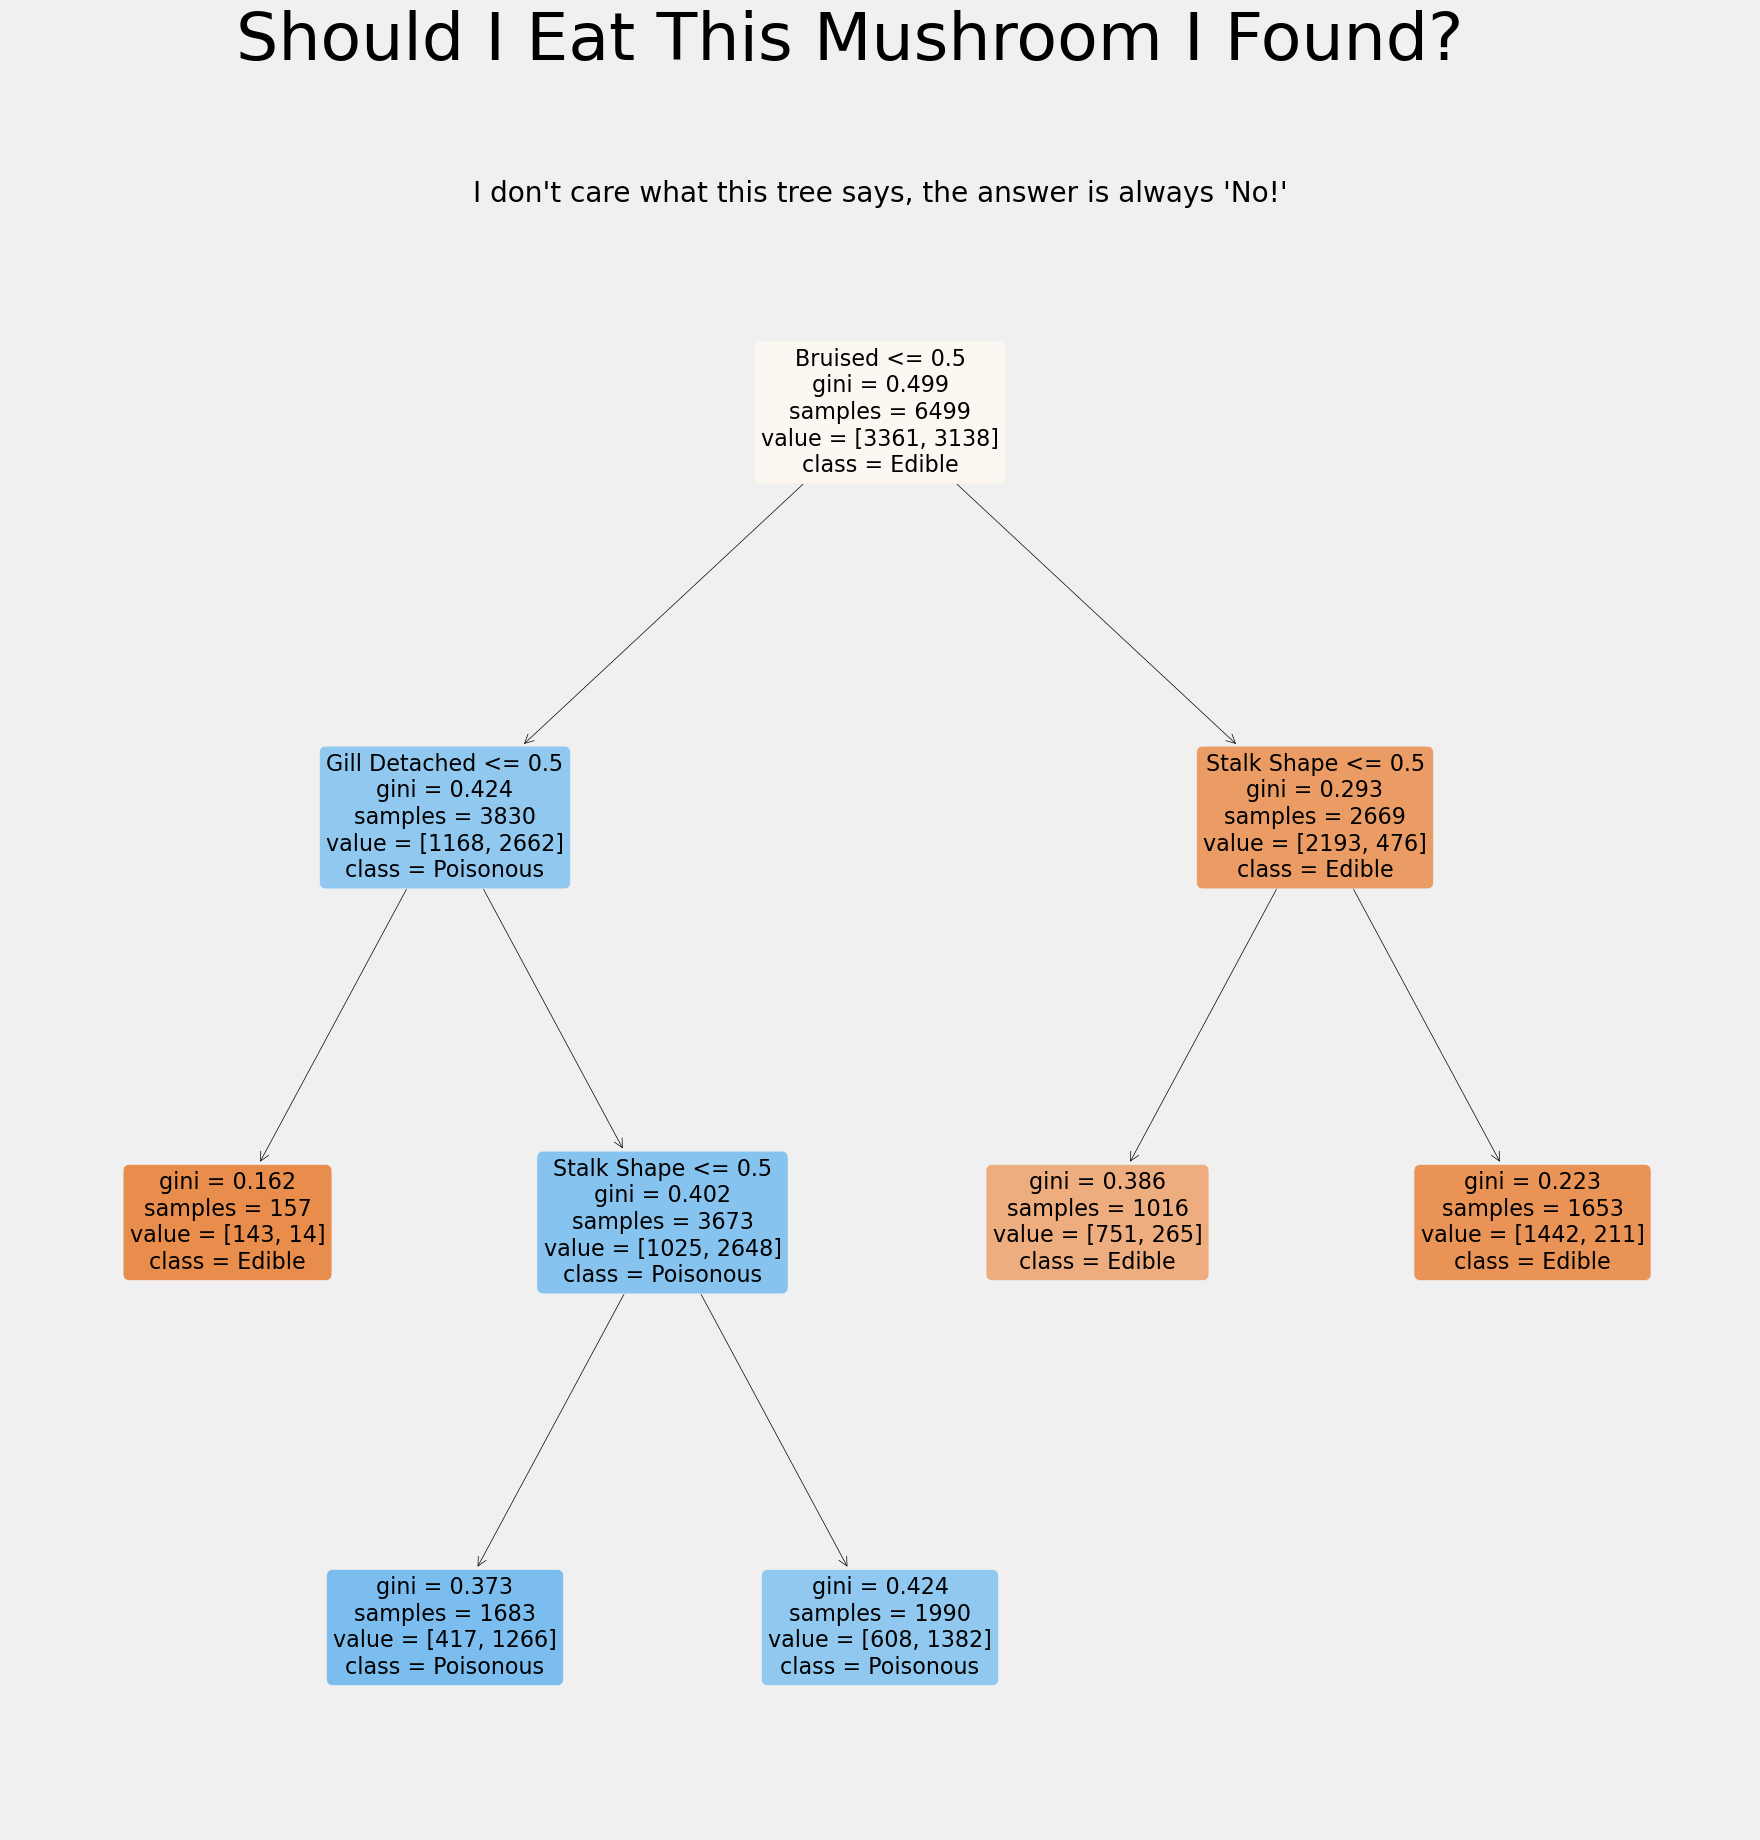

In [215]:

dtree = tree.DecisionTreeClassifier()
mush_tree_fit = dtree.fit(X, y)

features = np.array(["Gill Detached", "Bruised", "Stalk Shape"])
targets= ["Edible", "Poisonous"]

plots.figure(figsize = (20,20))
tree.plot_tree(mush_tree_fit, fontsize = 16,rounded = True , filled = True, class_names = targets, feature_names= features, label ="all");
plots.suptitle("Should I Eat This Mushroom I Found?", size=48)
plots.title("I don't care what this tree says, the answer is always 'No!'");


Let's use the `.predict` method to get the final output of the decision tree.  We'll also compare the prediction with the actual and we'll eventually move on to using the testing data.  

In [223]:
Table().with_columns("Actual", y.to_numpy(), "Prediction", mush_tree_fit.predict(X))

Actual,Prediction
p,p
e,e
e,e
p,e
p,p
e,p
p,p
e,e
p,p
e,e


In [224]:
Table().with_columns("Actual", y.to_numpy(), "Prediction", mush_tree_fit.predict(X)).pivot("Prediction", "Actual")

Actual,e,p
e,2336,1025
p,490,2648


In [226]:
TwoWaySummary(np.array([[2336, 1025],[490, 2648]]))

sensitivity = 0.6950312407021719
specificity = 0.8438495857233907
relative risk = 4.451036802700848
accuracy = 0.7668872134174488


In the training data, there are 2648 poisonous mushrooms that are correctly identified and 2336 edible mushrooms that are also correctly labeled as edible.  However, there are 490 poisonous mushrooms incorrectly labeled as edible.  This is the training data.  If the model was over-fit, it would work great on the training data and then be terrible on the testing data.  Let's see how that goes.  

In [227]:
pois_pred = mush_tree_fit.predict(X_test)
pois_pred

array(['e', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

In [228]:
y_test.to_numpy()

array(['p', 'e', 'p', ..., 'e', 'p', 'p'], dtype=object)

In [229]:
Table().with_columns("Pred", pois_pred, "Actual", y_test.to_numpy()).pivot("Pred", "Actual")

Actual,e,p
e,1315,563
p,304,1453


In [230]:
conf_matrix = np.array([[1315, 563], [304, 1453]])

TwoWaySummary(conf_matrix)

sensitivity = 0.7002129925452609
specificity = 0.8269778030734206
relative risk = 4.04695469704613
accuracy = 0.7614855570839064


As you can see from the confusion matrix, this model leads to 304 False Positives, meaning there are 304 poisonous mushrooms that this model identifies as edible in the Testing data.  Not good.  

What is **good**, is that by all of the metrics that we learned about, the confusion matrix is roughly the same for the training and testing data.  What that implies is that our model is not over-fit.  

## The Divorce Data Set

Recall this divorce data set that we used in previous examples.  Can we use this data to build a predictive model for who will end up staying married?

In [149]:
divorce_train = pd.read_csv("divorce2_train.csv")

divorce_train

,Unnamed: 0,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,...,Atr51,Atr52,Atr53,Atr54,Class,Positive Sum,Negative Sum,Intercept,Positive Scale,Negative Scale
0,37,3,3,2,3,3,1,1,3,3,...,3,3,4,4,1,89,86,1,2.966667,3.583333
1,140,0,2,0,0,0,1,0,0,0,...,1,3,2,2,0,7,24,1,0.233333,1.000000
2,72,3,3,3,3,3,1,1,3,3,...,3,3,3,3,1,86,69,1,2.866667,2.875000
3,137,0,0,1,0,0,0,0,1,1,...,3,3,3,1,0,4,28,1,0.133333,1.166667
4,133,1,2,0,0,0,0,0,0,0,...,2,2,1,0,0,10,22,1,0.333333,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,54,4,3,3,2,4,1,0,3,3,...,3,4,3,4,1,89,80,1,2.966667,3.333333
132,15,4,4,3,2,4,0,0,4,3,...,4,4,4,4,1,97,92,1,3.233333,3.833333
133,133,1,2,0,0,0,0,0,0,0,...,2,2,1,0,0,10,22,1,0.333333,0.916667
134,145,0,0,0,0,0,0,0,0,0,...,3,0,1,0,0,0,34,1,0.000000,1.416667


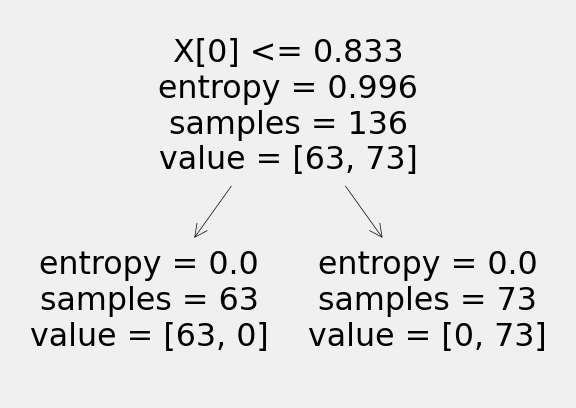

In [164]:

x=divorce_train[["Positive Scale", "Negative Scale"]]

#X = pd.get_dummies(x, drop_first = True)

y=divorce_train["Class"]

div_tree = dtree.fit(x, y)

tree.plot_tree(div_tree);

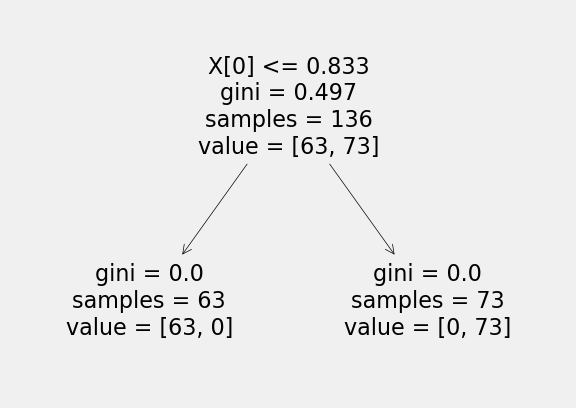

In [152]:
tree.plot_tree(div_tree, fontsize = 16);

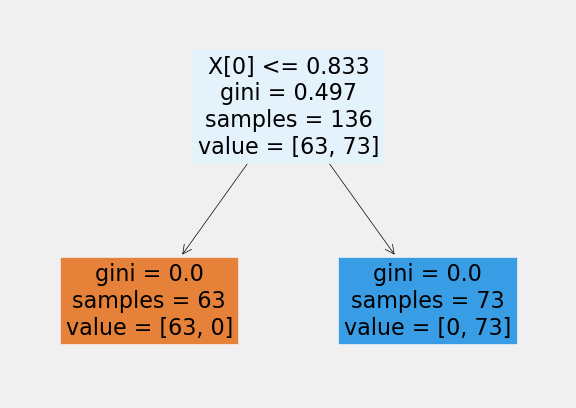

In [153]:
tree.plot_tree(div_tree, fontsize = 16, filled = True);

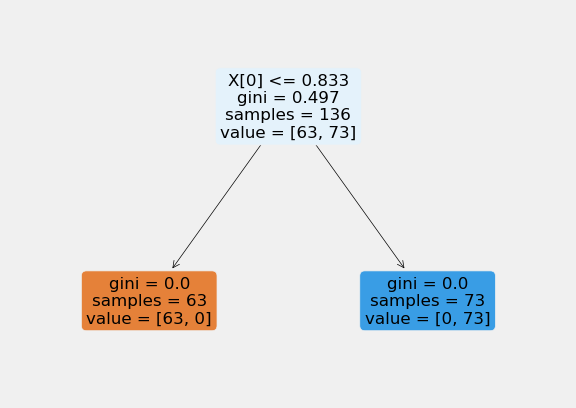

In [154]:
tree.plot_tree(div_tree, fontsize = 12, filled = True, rounded = True);

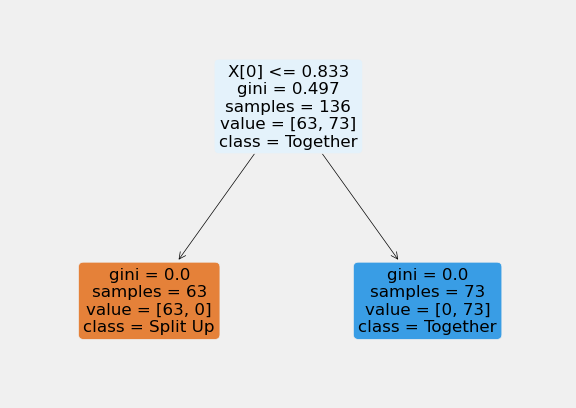

In [155]:
tree.plot_tree(div_tree, fontsize = 12, filled = True, rounded = True, label = "all", class_names = ["Split Up", "Together"]);

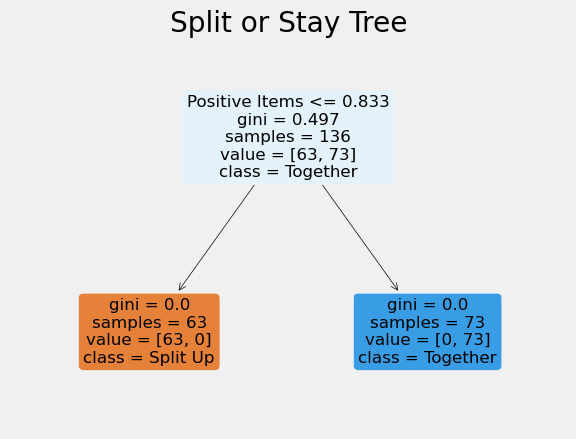

In [156]:
tree.plot_tree(div_tree, fontsize = 12, filled = True, rounded = True, label = "all", class_names = ["Split Up", "Together"], feature_names = ["Positive Items", "Negative Items"]);
plots.title("Split or Stay Tree");

In [200]:
big_X = divorce_train.iloc[:,1:55] 

big_X

big_X_test = pd.read_csv("divorce2_test.csv")

big_X_test = big_X_test.iloc[:, 1:55]

big_X_test

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0
2,0,0,1,0,0,2,0,0,0,1,...,0,2,2,1,2,1,1,1,2,0
3,4,4,4,3,4,0,0,4,4,3,...,4,4,4,4,4,4,4,4,4,4
4,3,4,3,4,3,0,1,4,3,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,0,1,0,0,0,0,0,0,2,...,2,3,0,2,0,0,2,1,0,0
72,2,1,1,0,0,2,0,0,0,2,...,0,1,0,3,1,1,3,1,1,1
73,1,1,0,0,0,0,0,0,0,1,...,2,3,0,2,0,1,1,3,0,0
74,0,0,0,0,0,0,0,0,0,0,...,4,3,3,2,2,3,2,4,3,1


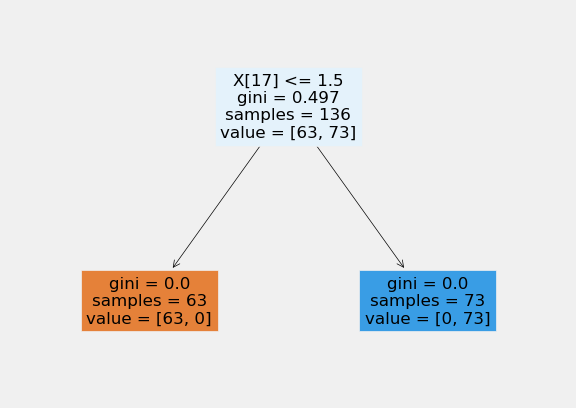

In [158]:
div_tree2 = dtree.fit(big_X, y)

tree.plot_tree(div_tree2, filled =True, label = "all", fontsize = 12);


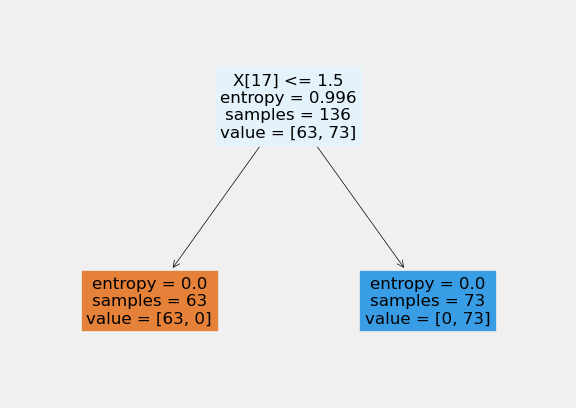

In [160]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy")

div_tree3 = dtree.fit(big_X, y)

tree.plot_tree(div_tree3, filled =True, label = "all", fontsize = 12);


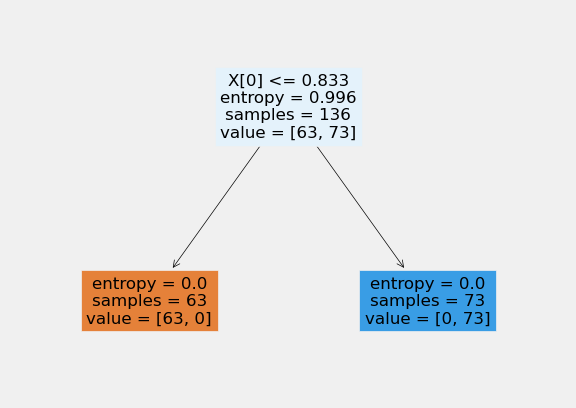

In [161]:
div_tree4 = dtree.fit(x,y)
tree.plot_tree(div_tree4, filled =True, label = "all", fontsize = 12);


In [166]:
div_test = pd.read_csv("divorce2_test.csv")

x_test = div_test.iloc[:,56:58]

x_test

,Positive Sum,Negative Sum
0,15,44
1,25,29
2,17,34
3,107,92
4,99,92
...,...,...
71,15,22
72,15,21
73,11,27
74,1,37


In [186]:
y_pred = div_tree.predict(x_test)

In [187]:
y_test = pd.read_csv("divorce2_test.csv")

y_test = y_test.iloc[:, 55]

y_test.to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [192]:
Table().with_columns("Pred", y_pred, "Actual", y_test).pivot("Pred", "Actual")

Actual,0,1
0,6,32
1,0,38


In [193]:
confusion_matrix = np.array([[38, 0],[32, 6]])

confusion_matrix

array([[38,  0],
       [32,  6]])

In [196]:
# Here's the two-way summary we wrote ourselves

TwoWaySummary(confusion_matrix)

sensitivity = 1.0
specificity = 0.15789473684210525
relative risk = 1.1875
accuracy = 0.5789473684210527


In [198]:
# Here's some report that is included in the sklearn module

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.16      0.27        38
           1       0.54      1.00      0.70        38

    accuracy                           0.58        76
   macro avg       0.77      0.58      0.49        76
weighted avg       0.77      0.58      0.49        76



In [199]:
#help(metrics.classification_report)

In [203]:
y_pred_big = div_tree2.predict(big_X_test)

Table().with_columns("Pred", y_pred_big, "Actual", y_test).pivot("Pred", "Actual")

Actual,0,1
0,38,0
1,3,35


In [206]:
confusion_matrix2 = np.array([[35, 3],[0,38]])

TwoWaySummary(confusion_matrix2)

sensitivity = 0.9210526315789473
specificity = 1.0
relative risk = inf
accuracy = 0.9605263157894737


C:\Users\baile\AppData\Local\Temp\ipykernel_32152\4048741674.py:26: RuntimeWarning: divide by zero encountered in long_scalars
  print(f"sensitivity = {a/(a+b)}\nspecificity = {d/(c+d)}\nrelative risk = {a*(c+d)/(c*(a+b))}\naccuracy = {(a+d)/(a+d+c+b)}")
